In [1]:
import pandas
import os
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import SimpleITK as sitk

## Try simpleITK

In [2]:
from __future__ import print_function
import importlib
from distutils.version import LooseVersion

# check that all packages are installed (see requirements.txt file)
required_packages = {'jupyter', 
                     'numpy',
                     'matplotlib',
                     'ipywidgets',
                     'scipy',
                     'pandas',
                     'SimpleITK'
                    }

problem_packages = list()
# Iterate over the required packages: If the package is not installed
# ignore the exception. 
for package in required_packages:
    try:
        p = importlib.import_module(package)        
    except ImportError:
        problem_packages.append(package)
    
if len(problem_packages) is 0:
    print('All is well.')
else:
    print('The following packages are required but not installed: ' \
          + ', '.join(problem_packages))

<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?


All is well.


/tmp/slurm-22717990/ipykernel_57751/2845838451.py:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(problem_packages) is 0:


In [3]:
import SimpleITK as sitk

from ipywidgets import interact

print(sitk.Version())

SimpleITK Version: 2.2.1 (ITK 5.3)
Compiled: Dec  2 2022 12:24:46



In [4]:
# Uncomment the line below to change the default external viewer to your viewer of choice and test that it works.
#%env SITK_SHOW_COMMAND /gpfs3/well/papiez/users/hri611/python/itksnap-3.8.0-20190612-Linux-gcc64/lib/snap-3.8.0/ITK-SNAP

# %env SITK_SHOW_COMMAND /apps/eb/2020b/skylake/software/ImageJ/1.52q-Java-1.8

%env SITK_SHOW_COMMAND /gpfs3/well/papiez/users/hri611/python/Fiji.app/ImageJ-linux64
# Retrieve an image from the network, read it and display using the external viewer. 
# The show method will also set the display window's title and by setting debugOn to True, 
# will also print information with respect to the command it is attempting to invoke.
# NOTE: The debug information is printed to the terminal from which you launched the notebook
#       server.

env: SITK_SHOW_COMMAND=/gpfs3/well/papiez/users/hri611/python/Fiji.app/ImageJ-linux64


## Explore dataset

In [2]:
# look at how many there are for each patient
DATA_DIR = '/well/papiez/shared/FDG-PET-CT-Lesions'
example_folder = os.listdir(DATA_DIR)[0]
os.listdir(os.path.join(DATA_DIR,example_folder))
count = 0
for folder in os.listdir(DATA_DIR):
    if len(os.listdir(os.path.join(DATA_DIR,folder)))>1:
        count += 1
print(count)

i = 0
example_folder = os.listdir(DATA_DIR)[i]
scan_data = os.listdir(os.path.join(DATA_DIR,example_folder))[0]

81


In [6]:
os.path.join(DATA_DIR,example_folder,scan_data,'CTres.nii.gz')

'/well/papiez/shared/FDG-PET-CT-Lesions/PETCT_27ad42f8a9/07-14-2002-NA-PET-CT Ganzkoerper  primaer mit KM-67664/CTres.nii.gz'

In [7]:
#mr_image = sitk.ReadImage(os.path.join(DATA_DIR,example_folder,scan_data,'CTres.nii.gz'))
path = '/well/papiez/shared/FDG-PET-CT-Lesions/PETCT_27ad42f8a9/07-14-2002-NA-PET-CT Ganzkoerper  primaer mit KM-67664/CTres.nii.gz'
mr_image = sitk.ReadImage(path)


In [8]:
interact(lambda x: x, x=(0,10));

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

In [9]:
sitk.Show(mr_image,debugOn=True)

MetaImageIO (0x8c58b00): Unsupported or empty metaData item ITK_FileNotes of type Ssfound, won't be written to image file

MetaImageIO (0x8c58b00): Unsupported or empty metaData item aux_file of type Ssfound, won't be written to image file

MetaImageIO (0x8c58b00): Unsupported or empty metaData item descrip of type Ssfound, won't be written to image file

MetaImageIO (0x8c58b00): Unsupported or empty metaData item intent_name of type Ssfound, won't be written to image file

MetaImageIO (0x8c58b00): Unsupported or empty metaData item qto_xyz of type N3itk6MatrixIfLj4ELj4EEEfound, won't be written to image file

Debug: In /tmp/SimpleITK/Code/IO/src/sitkImageViewer.cxx, line 495: ExecuteCommand: '/gpfs3/well/papiez/users/hri611/python/Fiji.app/ImageJ-linux64' '/tmp/TempFile-57751-0.mha' 


Debug: In /tmp/SimpleITK/Code/IO/src/sitkImageViewer.cxx, line 536: Normal process exit.  exitValue = 0

Debug: In /tmp/SimpleITK/Code/IO/src/sitkImageViewer.cxx, line 576: Done.  Deleting process.



In [5]:
i = 0
example_folder = os.listdir(DATA_DIR)[i]
scan_data = os.listdir(os.path.join(DATA_DIR,example_folder))[0]

In [ ]:
os.listdir(os.path.join(DATA_DIR,example_folder,scan_data))

SEG
(400, 400, 324)
SUV
(400, 400, 324)


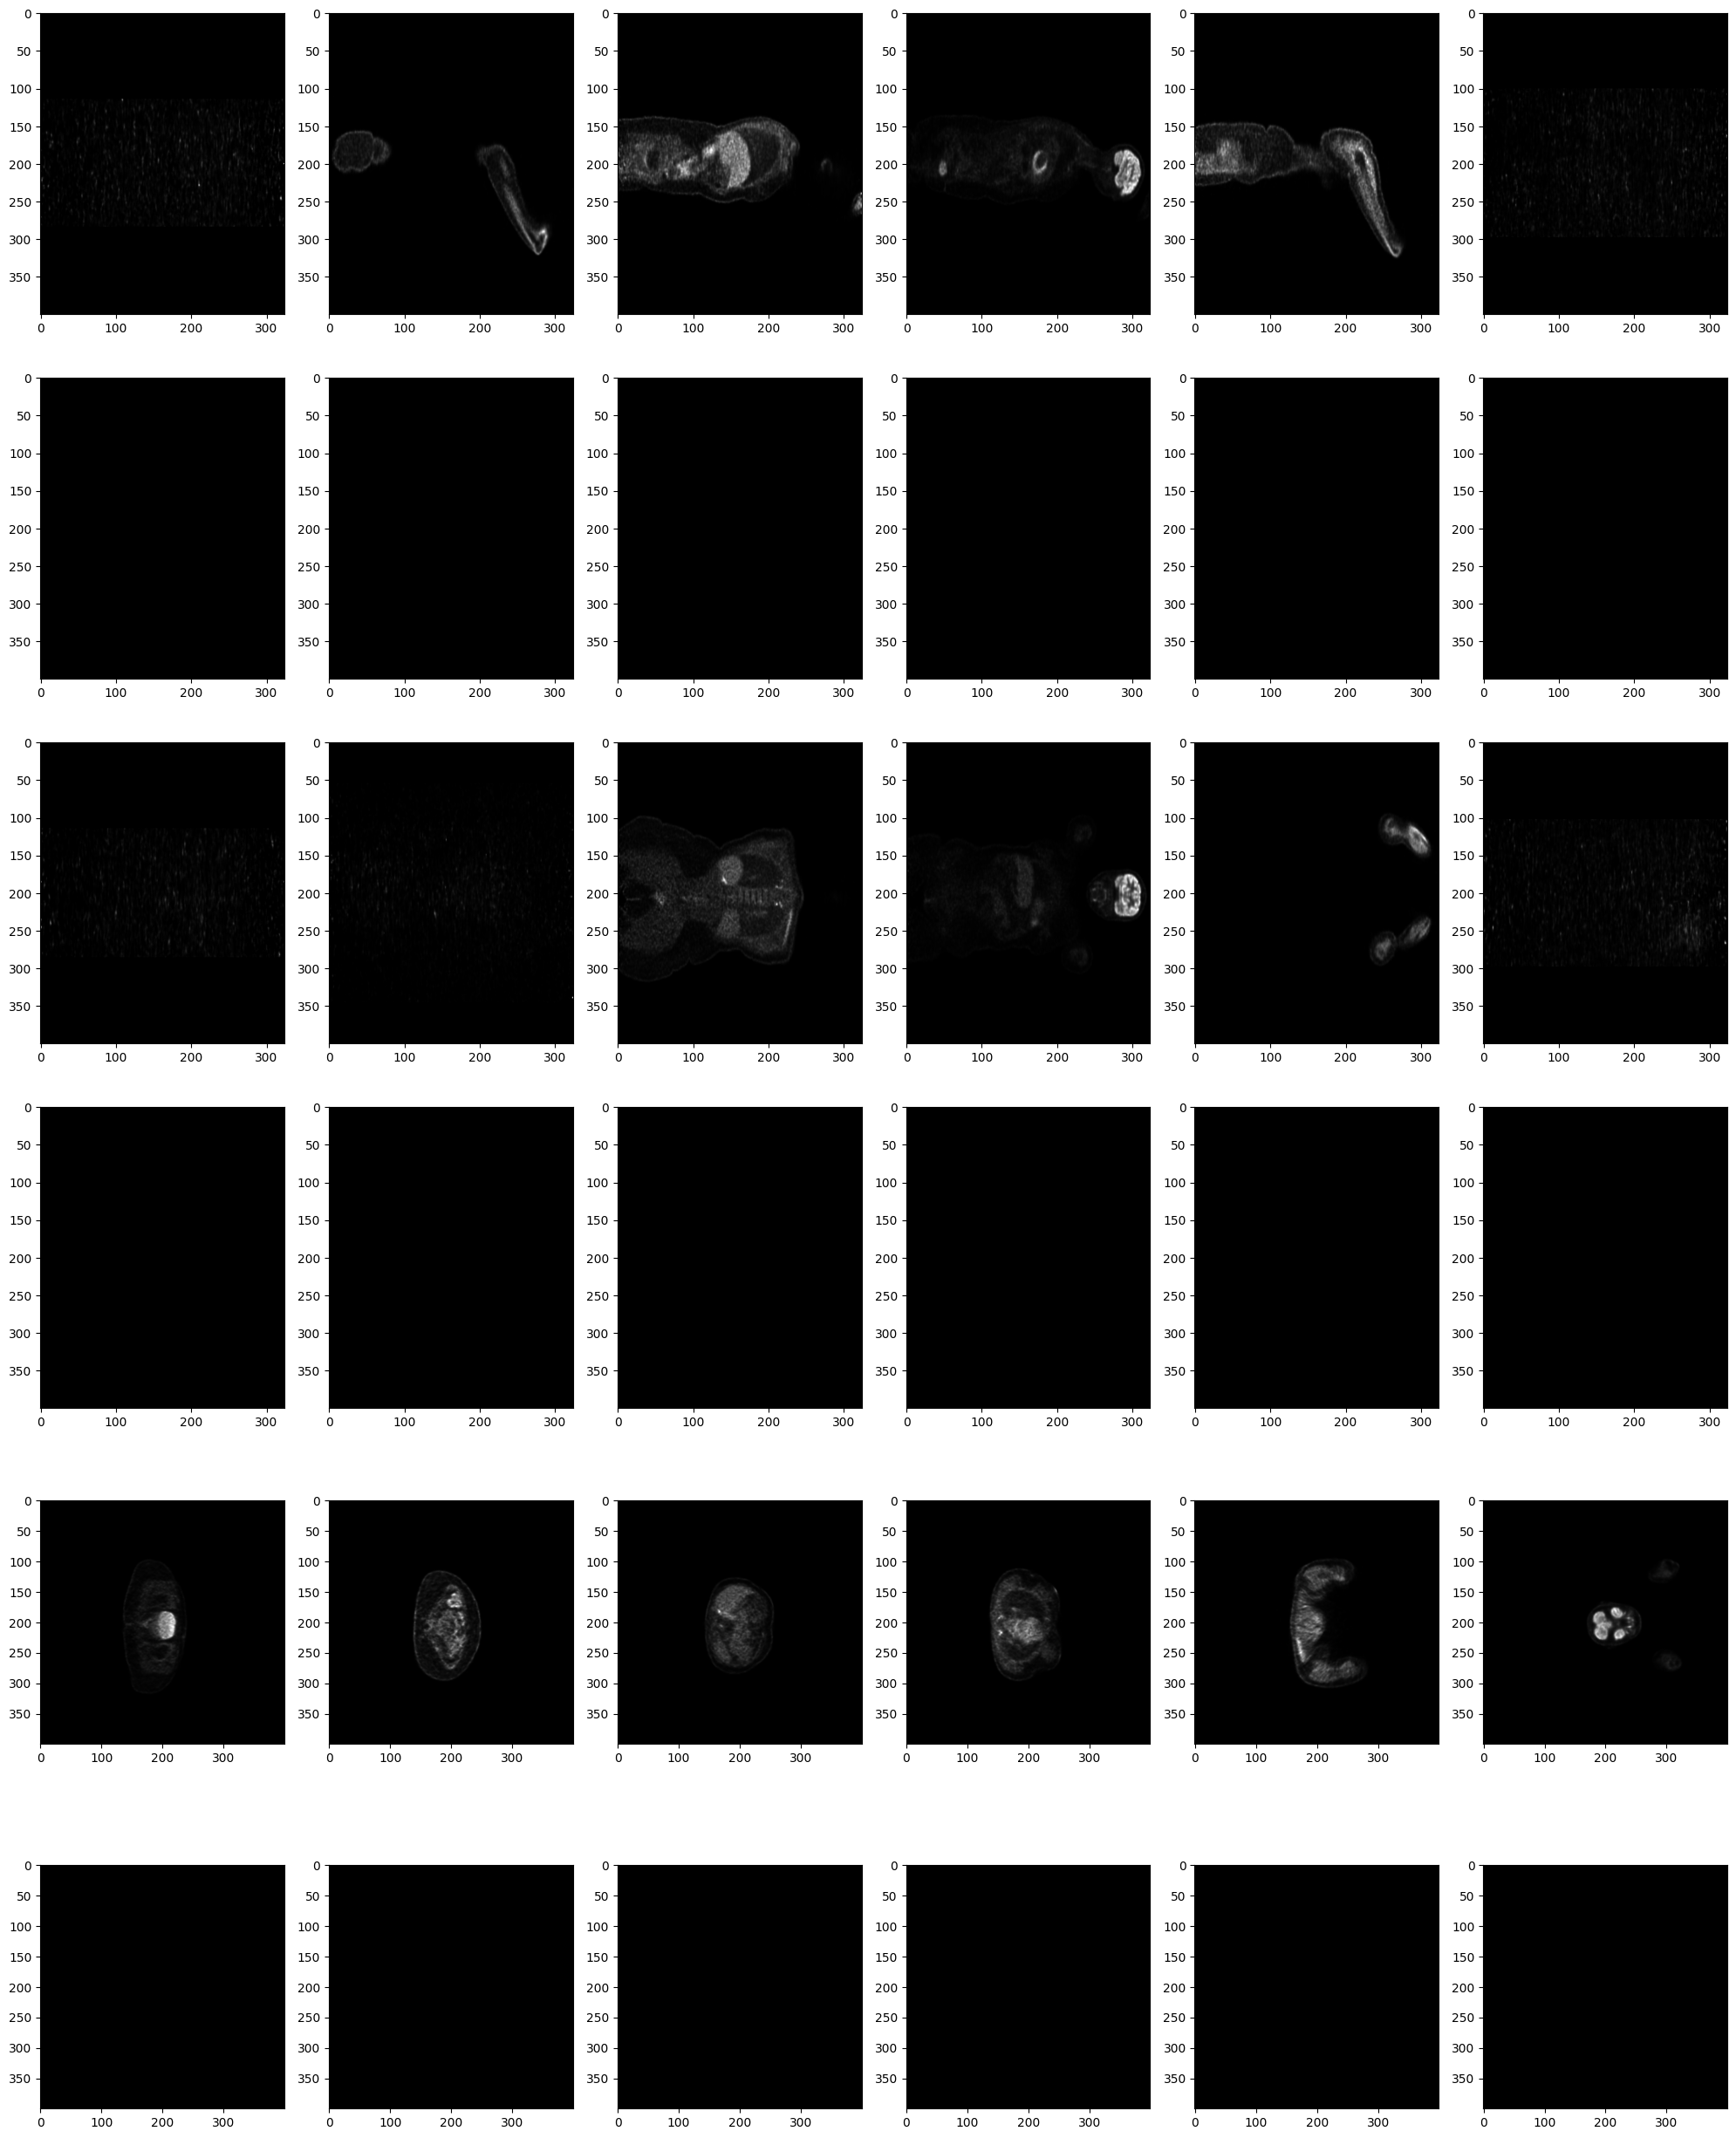

In [8]:
def visualise_patient_mod(i, modality):
    # modality is either CT, PET, SEG, CTres, SUV
    example_folder = os.listdir(DATA_DIR)[i]
    scan_data = os.listdir(os.path.join(DATA_DIR, example_folder))[0]
    
    fig, axes = plt.subplots(6, 6, figsize=(20, 25))  # Create a figure with subplots
    
    for file in os.listdir(os.path.join(DATA_DIR, example_folder, scan_data)):
        if file.startswith(modality):
            mod = nib.load(os.path.join(DATA_DIR, example_folder, scan_data, file))
            print(modality)
            print(mod.header.get_data_shape())
            x, y, z = mod.header.get_data_shape()
        if file.startswith('SEG'):
            SEG = nib.load(os.path.join(DATA_DIR, example_folder, scan_data, file))
            print('SEG')
            print(SEG.header.get_data_shape())
            s_x, s_y, s_z = SEG.header.get_data_shape()
            

            # Visualize image
    for j in range(6):
        # started at 50 bc it often seems like there's nothing at beginning of image
        axes[0,j].imshow(mod.get_fdata()[50 + int(j * (x-50) / 6), :, :], cmap='gray')  # Full length side view (Sagittal view)
        
        axes[1,j].imshow(SEG.get_fdata()[50 + int(j * (s_x-50) / 6), :, :], cmap='gray')  # Full length side view (Sagittal view)

        axes[2,j].imshow(mod.get_fdata()[:, 50 + int(j * (y-50) / 6), :], cmap='gray')  # full length front viewCoronal view
        
        axes[3,j].imshow(SEG.get_fdata()[:,50 + int(j * (s_y-50) / 6), :], cmap='gray')  # Full length side view (Sagittal view)

        axes[4,j].imshow(mod.get_fdata()[:, :, 50 + int(j * (z-50) / 6)], cmap='gray')  # Axial view
        
        axes[5,j].imshow(SEG.get_fdata()[:,:,50 + int(j * (s_z-50) / 6)], cmap='gray')  # Full length side view (Sagittal view)


    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

visualise_patient_mod(19, 'SUV')

SEG
(400, 400, 285)
CTres
(400, 400, 285)


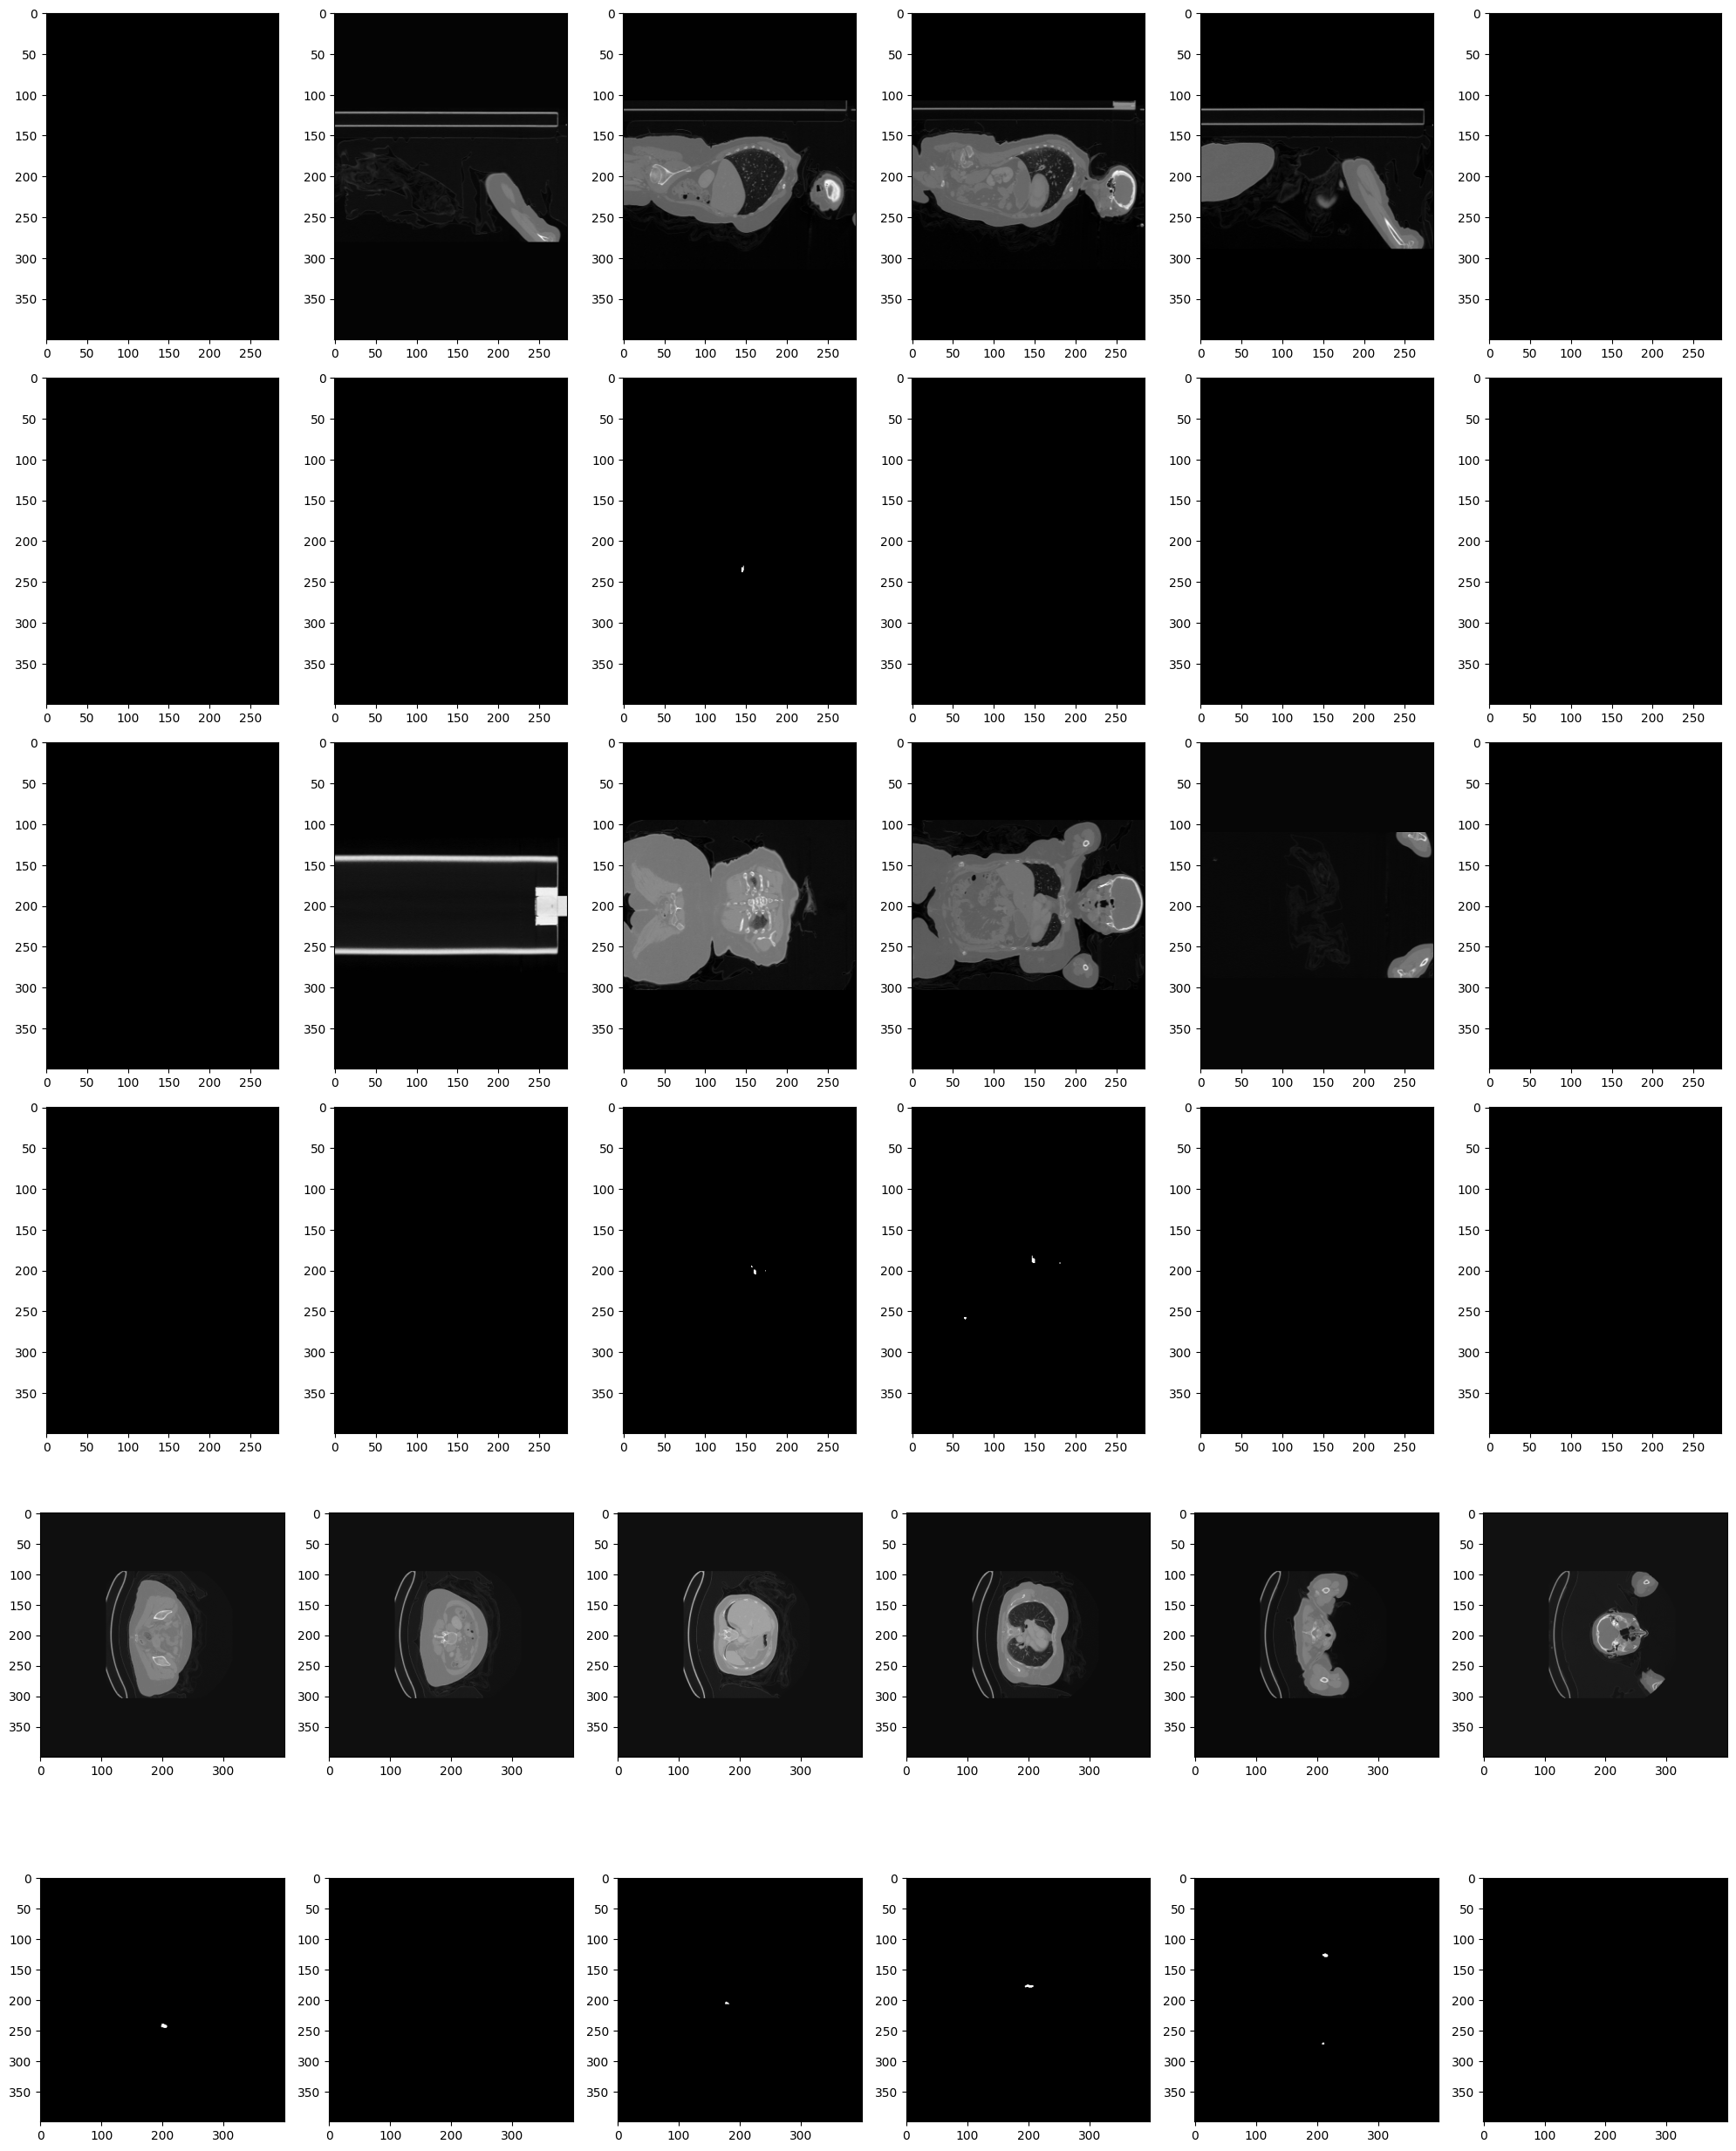

In [9]:
def visualise_patient_mod(i, modality):
    # modality is either CT, PET, SEG, CTres, SUV
    example_folder = os.listdir(DATA_DIR)[i]
    scan_data = os.listdir(os.path.join(DATA_DIR, example_folder))[0]
    
    fig, axes = plt.subplots(6, 6, figsize=(20, 25))  # Create a figure with subplots
    
    for file in os.listdir(os.path.join(DATA_DIR, example_folder, scan_data)):
        if file.startswith(modality):
            mod = nib.load(os.path.join(DATA_DIR, example_folder, scan_data, file))
            print(modality)
            print(mod.header.get_data_shape())
            x, y, z = mod.header.get_data_shape()
        if file.startswith('SEG'):
            SEG = nib.load(os.path.join(DATA_DIR, example_folder, scan_data, file))
            print('SEG')
            print(SEG.header.get_data_shape())
            s_x, s_y, s_z = SEG.header.get_data_shape()
            

            # Visualize image
    for j in range(6):
        # started at 50 bc it often seems like there's nothing at beginning of image
        axes[0,j].imshow(mod.get_fdata()[50 + int(j * (x-50) / 6), :, :], cmap='gray')  # Full length side view (Sagittal view)
        
        axes[1,j].imshow(SEG.get_fdata()[50 + int(j * (s_x-50) / 6), :, :], cmap='gray')  # Full length side view (Sagittal view)

        axes[2,j].imshow(mod.get_fdata()[:, 50 + int(j * (y-50) / 6), :], cmap='gray')  # full length front viewCoronal view
        
        axes[3,j].imshow(SEG.get_fdata()[:,50 + int(j * (s_y-50) / 6), :], cmap='gray')  # Full length side view (Sagittal view)

        axes[4,j].imshow(mod.get_fdata()[:, :, 50 + int(j * (z-50) / 6)], cmap='gray')  # Axial view
        
        axes[5,j].imshow(SEG.get_fdata()[:,:,50 + int(j * (s_z-50) / 6)], cmap='gray')  # Full length side view (Sagittal view)


    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

visualise_patient_mod(18, 'CTres')


In [4]:
header = SEG.header
print(header) 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 400 400 304   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.       2.03642  2.03642  3.       1.       1.       1.       1.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 406.694
qoffset_y       : -205.44357
qoffset_z       : -11

In [6]:
print(header.get_data_dtype())

uint8


In [7]:
print(header.get_zooms())

(2.03642, 2.03642, 3.0)


## Data conversion

In [4]:
import shutil
from sklearn.model_selection import train_test_split


# make train/test folders
train_images_dir = 'nnUnet_raw/Dataset220_PETCT/imagesTr'
train_labels_dir = 'nnUnet_raw/Dataset220_PETCT/labelsTr'
    
test_images_dir = 'nnUnet_raw/Dataset220_PETCT/imagesTs'
test_labels_dir = 'nnUnet_raw/Dataset220_PETCT/labelsTs'

if not os.path.exists(train_images_dir):
    os.mkdir(os.path.join(train_images_dir))

if not os.path.exists(train_labels_dir):
    os.mkdir(os.path.join(train_labels_dir))

if not os.path.exists(test_images_dir):
    os.mkdir(os.path.join(test_images_dir))

if not os.path.exists(test_labels_dir):
    os.mkdir(os.path.join(test_labels_dir))
    
patient_folders= os.listdir(DATA_DIR)

# Split the patient folders into train and test sets
train_patient_folders, test_patient_folders = train_test_split(patient_folders, test_size=0.1, random_state=42)

def copy_data_to_folder(patient_folders,images_dir,labels_dir,DATA_DIR = DATA_DIR):
    for patient_folder in patient_folders:
        patient_id = patient_folder.split("_")[1]
        for data_folder in os.listdir(os.path.join(DATA_DIR,patient_folder)):
            date = data_folder.split("-")[0]+data_folder.split("-")[1]+data_folder.split("-")[2]
            for file in os.listdir(os.path.join(DATA_DIR,patient_folder,data_folder)):

                old_file_path = os.path.join(DATA_DIR,patient_folder,data_folder,file)
                if file.startswith('CTres'):
                    print(file)
                    # 0000 is CT
                    new_fname = 'PETCT_' + patient_id + '_' + date + '_0000' + '.nii.gz'
                    shutil.copy(old_file_path,images_dir)
                    os.rename(os.path.join(images_dir,'CTres.nii.gz'),os.path.join(images_dir,new_fname))

                elif file.startswith('SUV'):
                    print(file)
                    # 0001 is PET
                    new_fname = 'PETCT_' + patient_id + '_' + date + '_0001' + '.nii.gz'
                    shutil.copy(os.path.join(DATA_DIR,patient_folder,data_folder,file),images_dir)
                    os.rename(os.path.join(images_dir,'SUV.nii.gz'),os.path.join(images_dir,new_fname))

                elif file.startswith('SEG'):
                    print(file)
                    new_fname = 'PETCT_' + patient_id + '_' + date + '.nii.gz'
                    shutil.copy(os.path.join(DATA_DIR,patient_folder,data_folder,file),labels_dir)
                    os.rename(os.path.join(labels_dir,'SEG.nii.gz'),os.path.join(labels_dir,new_fname))

In [5]:
copy_data_to_folder(train_patient_folders,train_images_dir,train_labels_dir)
copy_data_to_folder(test_patient_folders,test_images_dir,test_labels_dir)


SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii

SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.g

SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.g

SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii

SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii.gz
SUV.nii.gz
SEG.nii.gz
CTres.nii

In [16]:
new_imagesTs = os.listdir('nnUnet_raw/Dataset220_PETCT/imagesTs')
old_imagesTs = os.listdir('nnUnet_raw/Dataset219_PETCT/imagesTs')

In [17]:
true =0
false=0
for i in range(len(new_imagesTs)):
    if new_imagesTs[i]==old_imagesTs[i]:
        true +=1
    else:
        false+=1
    


In [19]:
true

190


### Make dataset.json


In [15]:
# need to rerun this and count how many training images i have now
print(len(os.listdir(train_images_dir)))
print(len(os.listdir(test_images_dir)))
print(len(os.listdir(train_labels_dir)))
print(len(os.listdir(test_labels_dir)))

NameError: name 'train_images_dir' is not defined

In [30]:
from typing import Tuple

from batchgenerators.utilities.file_and_folder_operations import save_json, join


def generate_dataset_json(output_folder: str,
                          channel_names: dict,
                          labels: dict,
                          num_training_cases: int,
                          file_ending: str,
                          regions_class_order: Tuple[int, ...] = None,
                          dataset_name: str = None, reference: str = None, release: str = None, license: str = None,
                          description: str = None,
                          overwrite_image_reader_writer: str = None, **kwargs):
    """
    Generates a dataset.json file in the output folder

    channel_names:
        Channel names must map the index to the name of the channel, example:
        {
            0: 'T1',
            1: 'CT'
        }
        Note that the channel names may influence the normalization scheme!! Learn more in the documentation.

    labels:
        This will tell nnU-Net what labels to expect. Important: This will also determine whether you use region-based training or not.
        Example regular labels:
        {
            'background': 0,
            'left atrium': 1,
            'some other label': 2
        }
        Example region-based training:
        {
            'background': 0,
            'whole tumor': (1, 2, 3),
            'tumor core': (2, 3),
            'enhancing tumor': 3
        }

        Remember that nnU-Net expects consecutive values for labels! nnU-Net also expects 0 to be background!

    num_training_cases: is used to double check all cases are there!

    file_ending: needed for finding the files correctly. IMPORTANT! File endings must match between images and
    segmentations!

    dataset_name, reference, release, license, description: self-explanatory and not used by nnU-Net. Just for
    completeness and as a reminder that these would be great!

    overwrite_image_reader_writer: If you need a special IO class for your dataset you can derive it from
    BaseReaderWriter, place it into nnunet.imageio and reference it here by name

    kwargs: whatever you put here will be placed in the dataset.json as well

    """
    has_regions: bool = any([isinstance(i, (tuple, list)) and len(i) > 1 for i in labels.values()])
    if has_regions:
        assert regions_class_order is not None, f"You have defined regions but regions_class_order is not set. " \
                                                f"You need that."
    # channel names need strings as keys
    keys = list(channel_names.keys())
    for k in keys:
        if not isinstance(k, str):
            channel_names[str(k)] = channel_names[k]
            del channel_names[k]

    # labels need ints as values
    # i have 0 as no lesion and 1 as lesion
    for l in labels.keys():
        value = labels[l]
        if isinstance(value, (tuple, list)):
            value = tuple([int(i) for i in value])
            labels[l] = value
        else:
            labels[l] = int(labels[l])

    dataset_json = {
        'channel_names': channel_names,  # previously this was called 'modality'. I didnt like this so this is
        # channel_names now. Live with it.
        'labels': labels,
        'numTraining': num_training_cases,
        'file_ending': file_ending,
    }

    if dataset_name is not None:
        dataset_json['name'] = dataset_name
    if reference is not None:
        dataset_json['reference'] = reference
    if release is not None:
        dataset_json['release'] = release
    if license is not None:
        dataset_json['licence'] = license
    if description is not None:
        dataset_json['description'] = description
    if overwrite_image_reader_writer is not None:
        dataset_json['overwrite_image_reader_writer'] = overwrite_image_reader_writer
    if regions_class_order is not None:
        dataset_json['regions_class_order'] = regions_class_order

    dataset_json.update(kwargs)

    save_json(dataset_json, join(output_folder, 'dataset.json'), sort_keys=False)

generate_dataset_json(os.path.join('nnUnet_raw','Dataset219_PETCT'),{0:'CT',1:'PET'},{'no-lesion':0,'lesion':1},919,'.nii.gz')


### WOrking with Mona dataset

In [28]:
images_tr = '/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr'
labels_tr = '/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/labelsTr'

#print(os.listdir(images_tr))[0:20]
print((os.listdir(labels_tr)))[0:20]

['MDA-146.nii.gz', 'MDA-022.nii.gz', 'MDA-154.nii.gz', 'MDA-112.nii.gz', 'MDA-076.nii.gz', 'MDA-162.nii.gz', 'CHUS-098.nii.gz', 'MDA-021.nii.gz', 'MDA-059.nii.gz', 'HGJ-092.nii.gz', 'CHUP-033.nii.gz', 'MDA-015.nii.gz', 'HMR-014.nii.gz', 'MDA-039.nii.gz', 'MDA-020.nii.gz', 'HGJ-067.nii.gz', 'MDA-176.nii.gz', 'MDA-051.nii.gz', 'CHUV-035.nii.gz', 'CHUV-006.nii.gz', 'MDA-145.nii.gz', 'CHUV-007.nii.gz', 'MDA-107.nii.gz', 'MDA-113.nii.gz', 'CHUS-030.nii.gz', 'MDA-148.nii.gz', 'CHUV-014.nii.gz', 'MDA-151.nii.gz', 'MDA-157.nii.gz', 'MDA-073.nii.gz', 'CHUS-053.nii.gz', 'CHUM-008.nii.gz', 'CHUM-061.nii.gz', 'MDA-196.nii.gz', 'HGJ-007.nii.gz', 'CHUM-062.nii.gz', 'CHUV-023.nii.gz', 'MDA-041.nii.gz', 'CHUM-012.nii.gz', 'CHUM-046.nii.gz', 'CHUP-012.nii.gz', 'MDA-077.nii.gz', 'CHUS-064.nii.gz', 'MDA-068.nii.gz', 'MDA-150.nii.gz', 'CHUP-032.nii.gz', 'MDA-065.nii.gz', 'MDA-166.nii.gz', 'HMR-020.nii.gz', 'CHUV-045.nii.gz', 'CHUP-008.nii.gz', 'HGJ-086.nii.gz', 'MDA-083.nii.gz', 'CHUP-013.nii.gz', 'CHUV-0

TypeError: 'NoneType' object is not subscriptable

In [30]:
train_images_dir = 'nnUnet_raw/Dataset219_PETCT/imagesTr'
train_labels_dir = 'nnUnet_raw/Dataset219_PETCT/labelsTr'
#print((os.listdir(train_images_dir)))[0:10]
print((os.listdir(train_labels_dir)))

['PETCT_92c5c944a5_07152002.nii.gz', 'PETCT_9ffd8409b3_07152005.nii.gz', 'PETCT_f8de0cde56_12052005.nii.gz', 'PETCT_f60ea3abc5_05032003.nii.gz', 'PETCT_b7c1533a39_02122005.nii.gz', 'PETCT_82137245b0_01262002.nii.gz', 'PETCT_ccd8f5ff71_10292006.nii.gz', 'PETCT_9860ffe82d_11192004.nii.gz', 'PETCT_cb240e6f0f_04192007.nii.gz', 'PETCT_d3208ff062_03142003.nii.gz', 'PETCT_b3e923029c_07192003.nii.gz', 'PETCT_a2676f03c0_05092003.nii.gz', 'PETCT_27ad42f8a9_07142002.nii.gz', 'PETCT_19b68a666b_04142005.nii.gz', 'PETCT_94cc0dac49_03092007.nii.gz', 'PETCT_f11f3d3692_10242003.nii.gz', 'PETCT_d6a48a629d_03062003.nii.gz', 'PETCT_b327726c24_08272000.nii.gz', 'PETCT_12025abab5_11012004.nii.gz', 'PETCT_9f206193d3_04072003.nii.gz', 'PETCT_8838c53a63_05222005.nii.gz', 'PETCT_6aea5c3a03_12272001.nii.gz', 'PETCT_db3daf78d2_10302000.nii.gz', 'PETCT_7ed037687a_01272003.nii.gz', 'PETCT_f75d25523c_09132002.nii.gz', 'PETCT_3c3ee87fc6_06132003.nii.gz', 'PETCT_d206b891ee_10272005.nii.gz', 'PETCT_4076ea9a15_04292005.

In [ ]:
count = 0
new_images_dir = os.path.join('nnUnet_raw/Dataset221_PETCT/imagesTr')
new_labels_dir = os.path.join('nnUnet_raw/Dataset221_PETCT/labelsTr')
#os.mkdir(new_images_dir)
#os.mkdir(new_labels_dir)

# if the two directories do not exist make them
image_ids = []
for i in range(len(os.listdir(images_tr))):
    image = os.listdir(images_tr)[i]
    mod = nib.load(os.path.join(images_tr, os.listdir(images_tr)[i]))
    x,y,z=(mod.header.get_data_shape())
    
    if x>128 and y>128 and z>128 and 'PT' in image:
        id = image.split('__')[0]
        image_ids.append(id)
        

In [6]:
import os

#folder_path = 'nnUnet_raw/Dataset221_PETCT/imagesTr'  # Replace with the actual path to your folder
folder_path = 'nnUnet_raw/Dataset221_PETCT/labelsTr'
# List all files in the folder
file_list = os.listdir(folder_path)

# Iterate through the files and delete those that don't start with "PETCT"
for file_name in file_list:
    if not file_name.startswith("PETCT"):
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)
        print(f"Deleted: {file_path}")

print("Deletion completed.")

Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-098.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-033.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-035.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-006.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-007.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-113.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-030.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-053.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-023.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-012.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-064.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-032.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-045.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-008.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-013.nii.gz
Deleted: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-010.nii.gz
Deleted: 

In [7]:
import os
import shutil

#images_tr ='/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr'  # Replace with your actual path
new_images_dir = 'nnUnet_raw/Dataset221_PETCT/imagesTr' # Replace with your desired destination path
images_tr  = '/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample'

image_ids = [x.split("_")[0] for x in os.listdir(images_tr)][0:300]

# Create the destination directory if it doesn't exist
if not os.path.exists(new_images_dir):
    os.makedirs(new_images_dir)

for id in image_ids:
    ct_source_file = os.path.join(images_tr, f"{id}__CT.nii.gz")
    pt_source_file = os.path.join(images_tr, f"{id}__PT.nii.gz")

    ct_destination_file = os.path.join(new_images_dir, f"{id}_0000.nii.gz")
    pt_destination_file = os.path.join(new_images_dir, f"{id}_0001.nii.gz")

    # Check if the source files exist before copying
    if os.path.exists(ct_source_file):
        shutil.copyfile(ct_source_file, ct_destination_file)
        print(ct_source_file)

    if os.path.exists(pt_source_file):
        shutil.copyfile(pt_source_file, pt_destination_file)
        print(ct_source_file)



/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/MDA-200__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/MDA-200__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/MDA-040__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/MDA-040__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/CHUS-076__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/CHUS-076__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/CHUS-056__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/CHUS-056__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample/CHUS-008__CT.nii.gz
/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_t

In [8]:
len(image_ids)

300

In [9]:
# repeat for labels
images_tr ='/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/labelsTr_resample'  # Replace with your actual path
new_images_dir = 'nnUnet_raw/Dataset221_PETCT/labelsTr' # Replace with your desired destination path

# Create the destination directory if it doesn't exist
if not os.path.exists(new_images_dir):
    os.makedirs(new_images_dir)

for id in image_ids:
    ct_source_file = os.path.join(images_tr, f"{id}.nii.gz")

    ct_destination_file = os.path.join(new_images_dir, f"{id}.nii.gz")

    # Check if the source files exist before copying
    if os.path.exists(ct_source_file):
        shutil.copyfile(ct_source_file, ct_destination_file)


In [10]:
# change all segmentation labels so they are only 0 and 1s

import os
import nibabel as nib
import numpy as np

folder_path = "nnUnet_raw/Dataset221_PETCT/labelsTr"  # Replace with the actual folder path

# List all files in the folder
file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.startswith("M") or file_name.startswith("C") or file_name.startswith("H") :
        file_path = os.path.join(folder_path, file_name)

        # Load the NIfTI image
        img = nib.load(file_path)

        # Get the image data as a NumPy array
        img_data = img.get_fdata()

        # Replace values greater than 0 with 1
        img_data[img_data > 0] = 1

        # Create a new NIfTI image with the modified data
        modified_img = nib.Nifti1Image(img_data, img.affine)

        # Save the modified image with the same name
        modified_file_path = os.path.join(folder_path, file_name)
        nib.save(modified_img, modified_file_path)

        print(f"Processed and saved: {modified_file_path}")

print("Processing completed.")

Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-146.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-022.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-154.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-112.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-076.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-098.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-059.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/HGJ-092.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-033.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/HGJ-067.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-035.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-107.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-030.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETC

In [14]:
from typing import Tuple

from batchgenerators.utilities.file_and_folder_operations import save_json, join


def generate_dataset_json(output_folder: str,
                          channel_names: dict,
                          labels: dict,
                          num_training_cases: int,
                          file_ending: str,
                          regions_class_order: Tuple[int, ...] = None,
                          dataset_name: str = None, reference: str = None, release: str = None, license: str = None,
                          description: str = None,
                          overwrite_image_reader_writer: str = None, **kwargs):
    """
    Generates a dataset.json file in the output folder

    channel_names:
        Channel names must map the index to the name of the channel, example:
        {
            0: 'T1',
            1: 'CT'
        }
        Note that the channel names may influence the normalization scheme!! Learn more in the documentation.

    labels:
        This will tell nnU-Net what labels to expect. Important: This will also determine whether you use region-based training or not.
        Example regular labels:
        {
            'background': 0,
            'left atrium': 1,
            'some other label': 2
        }
        Example region-based training:
        {
            'background': 0,
            'whole tumor': (1, 2, 3),
            'tumor core': (2, 3),
            'enhancing tumor': 3
        }

        Remember that nnU-Net expects consecutive values for labels! nnU-Net also expects 0 to be background!

    num_training_cases: is used to double check all cases are there!

    file_ending: needed for finding the files correctly. IMPORTANT! File endings must match between images and
    segmentations!

    dataset_name, reference, release, license, description: self-explanatory and not used by nnU-Net. Just for
    completeness and as a reminder that these would be great!

    overwrite_image_reader_writer: If you need a special IO class for your dataset you can derive it from
    BaseReaderWriter, place it into nnunet.imageio and reference it here by name

    kwargs: whatever you put here will be placed in the dataset.json as well

    """
    has_regions: bool = any([isinstance(i, (tuple, list)) and len(i) > 1 for i in labels.values()])
    if has_regions:
        assert regions_class_order is not None, f"You have defined regions but regions_class_order is not set. " \
                                                f"You need that."
    # channel names need strings as keys
    keys = list(channel_names.keys())
    for k in keys:
        if not isinstance(k, str):
            channel_names[str(k)] = channel_names[k]
            del channel_names[k]

    # labels need ints as values
    # i have 0 as no lesion and 1 as lesion
    for l in labels.keys():
        value = labels[l]
        if isinstance(value, (tuple, list)):
            value = tuple([int(i) for i in value])
            labels[l] = value
        else:
            labels[l] = int(labels[l])

    dataset_json = {
        'channel_names': channel_names,  # previously this was called 'modality'. I didnt like this so this is
        # channel_names now. Live with it.
        'labels': labels,
        'numTraining': num_training_cases,
        'file_ending': file_ending,
    }

    if dataset_name is not None:
        dataset_json['name'] = dataset_name
    if reference is not None:
        dataset_json['reference'] = reference
    if release is not None:
        dataset_json['release'] = release
    if license is not None:
        dataset_json['licence'] = license
    if description is not None:
        dataset_json['description'] = description
    if overwrite_image_reader_writer is not None:
        dataset_json['overwrite_image_reader_writer'] = overwrite_image_reader_writer
    if regions_class_order is not None:
        dataset_json['regions_class_order'] = regions_class_order

    dataset_json.update(kwargs)

    save_json(dataset_json, join(output_folder, 'dataset.json'), sort_keys=False)

generate_dataset_json(os.path.join('nnUnet_raw','Dataset221_PETCT'),{0:'CT',1:'PET'},{'background':0,'lesion':1},1183,'.nii.gz')

In [12]:
print(len(os.listdir("nnUnet_raw/Dataset221_PETCT/labelsTr")))
print(len(os.listdir("nnUnet_raw/Dataset221_PETCT/imagesTr")))


1183
2366


In [13]:
1183+1183

2366

In [1]:
## Change segmentaion labels to only 0s and 1

In [2]:
import os
import nibabel as nib
import numpy as np

folder_path = "nnUnet_raw/Dataset221_PETCT/labelsTr"  # Replace with the actual folder path

# List all files in the folder
file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.startswith("M") or file_name.startswith("C") or file_name.startswith("H") :
        file_path = os.path.join(folder_path, file_name)

        # Load the NIfTI image
        img = nib.load(file_path)

        # Get the image data as a NumPy array
        img_data = img.get_fdata()

        # Replace values greater than 0 with 1
        img_data[img_data > 0] = 1

        # Create a new NIfTI image with the modified data
        modified_img = nib.Nifti1Image(img_data, img.affine)

        # Save the modified image with the same name
        modified_file_path = os.path.join(folder_path, file_name)
        nib.save(modified_img, modified_file_path)

        print(f"Processed and saved: {modified_file_path}")

print("Processing completed.")

Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-098.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-033.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-035.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-006.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-007.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/MDA-113.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-030.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-053.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-023.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-012.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUS-064.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUP-032.nii.gz
Processed and saved: nnUnet_raw/Dataset221_PETCT/labelsTr/CHUV-045.nii.gz
Processed and saved: nnUnet_raw/Dataset

In [18]:
import os
import nibabel as nib

images_tr_path = "nnUnet_raw/Dataset221_PETCT/imagesTr"  # Replace with the actual path
images_tr_path  = '/gpfs3/well/papiez/users/jwl443/Python/MICCAI/hecktor2022_training/imagesTr_resample'
id_size_mismatch_list = []

# Create a dictionary to store image sizes based on IDs
id_size_dict = {}

# Iterate through the files in the folder
for file_name in os.listdir(images_tr_path):
    if file_name.startswith("M") or file_name.startswith("C") or file_name.startswith("H"):
        # Extract the ID from the filename
        id = file_name.split("_")[0]

        # Load the NIfTI image to get its shape (size)
        img = nib.load(os.path.join(images_tr_path, file_name))
        img_size = img.header.get_data_shape()

        # Check if the ID is already in the dictionary
        if id in id_size_dict:
            # Compare the size of the current image with the one in the dictionary
            if img_size != id_size_dict[id]:
                id_size_mismatch_list.append(id)
        else:
            # If the ID is not in the dictionary, add it with its size
            id_size_dict[id] = img_size

# Print the list of IDs with size mismatches
print("IDs with size mismatches:", id_size_mismatch_list)

IDs with size mismatches: []


In [19]:
id_size_dict

{'MDA-200': (250, 250, 437),
 'MDA-040': (250, 250, 208),
 'CHUS-076': (288, 288, 213),
 'CHUS-056': (288, 288, 215),
 'CHUS-008': (288, 288, 191),
 'MDA-055': (250, 250, 508),
 'MDA-076': (250, 250, 208),
 'CHUS-065': (288, 288, 213),
 'MDA-075': (250, 250, 535),
 'MDA-137': (250, 250, 208),
 'MDA-071': (250, 250, 208),
 'CHUS-083': (288, 288, 201),
 'CHUM-021': (225, 225, 195),
 'HGJ-073': (225, 225, 149),
 'MDA-037': (250, 250, 208),
 'MDA-058': (250, 250, 208),
 'CHUV-011': (349, 349, 548),
 'CHUV-016': (250, 250, 142),
 'HMR-034': (225, 225, 149),
 'MDA-097': (250, 250, 508),
 'CHUS-004': (288, 288, 173),
 'MDA-112': (250, 250, 195),
 'CHUP-073': (250, 250, 425),
 'CHUP-020': (250, 250, 487),
 'MDA-170': (250, 250, 508),
 'CHUS-091': (288, 288, 212),
 'CHUS-100': (288, 288, 257),
 'CHUS-038': (288, 288, 208),
 'CHUM-042': (250, 250, 174),
 'CHUS-087': (288, 288, 225),
 'CHUP-005': (250, 250, 487),
 'CHUV-046': (349, 349, 548),
 'CHUP-013': (250, 250, 425),
 'CHUP-042': (250, 250, 

In [8]:
len([x for x in id_size_mismatch_list if x != 'PETCT'])

196

In [17]:
img = nib.load(os.path.join(images_tr_path, 'CHUS-089_0000.nii.gz'))
img.header.get_data_shape()

(512, 512, 142)

In [13]:
file_name

'PETCT_ae4dcc5dd3_10082004_0001.nii.gz'